In [3]:
 # import libraries
import numpy as  np
import pandas as pd
import  array
import matplotlib.pyplot as plt
import pandas.api.types as  ptypes
import seaborn as sb
import sklearn
from sklearn import preprocessing
import pickle
import warnings
import csv
warnings.filterwarnings('ignore')

In [4]:
# import dataset
dataset =  pd.read_csv('bike_sharing.csv')

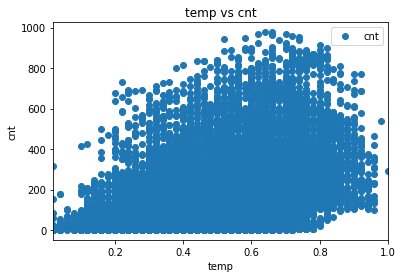

In [5]:
# ploting temp vs cnt
dataset.plot(x='temp', y='cnt', style='o')  
plt.title('temp vs cnt')  
plt.xlabel('temp')  
plt.ylabel('cnt')  
plt.show()

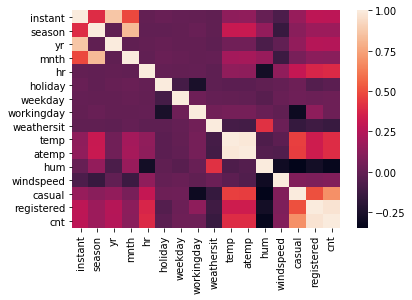

In [6]:
# correlation between columns
corr = dataset.corr()
sb.heatmap(corr)

In [7]:
# droping column that has negetive or no relationship together
dataset = dataset.drop(columns=['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 
                                'weekday','workingday', 'weathersit','atemp', 'hum', 'windspeed', 
                                'casual','registered'], axis=1)
dataset.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


In [8]:
dataset.describe()

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(dataset,test_size = 0.20,  random_state=0)

In [10]:
# save test data into csv file
x_test.to_csv('test.csv',index=False)

In [11]:
# save train data into csv file 
x_train.to_csv('train.csv',index=False)

In [12]:
# reading train csv file
train_data = pd.read_csv('train.csv')

In [13]:
# split train data into training data and testing data
from sklearn.model_selection import train_test_split
x_train_data,cross_valid = train_test_split(x_train,test_size = 0.20,random_state=0)

In [14]:
# save cross validation data to csv file
cross_valid.to_csv('Cross_validate.csv',index=False)

In [15]:
x_train_data.shape

(11122, 2)

In [16]:
cross_valid.shape

(2781, 2)

In [17]:
# split x_train_data into x and y  
x = x_train_data.iloc[:,:-1].values
y = x_train_data.iloc[:,1].values

In [18]:
y=y.reshape(-1,1)
y.shape

(11122, 1)

In [19]:
x_train_data.shape,cross_valid.shape

((11122, 2), (2781, 2))

In [20]:
# """ Data Preprocessing """
# from sklearn.preprocessing import Imputer
# from  sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from  sklearn.preprocessing import StandardScaler
# class Data_preprocessing:
    
# #     handling missind data
#     def handel_missing_data(self,dataset):
#         imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
#         imputer = imputer.fit(dataset[:,1:14])
#         dataset[:,1:14] = imputer.transform(dataset[:,1:14])
#         return dataset
# #     encodedependent variable
# #     def encode_dependent_variable(self,y):
# #         label_encoder_y = LabelEncoder()
# #         y = label_encoder_y.fit_transform(y)
#         return y
#     def feature_scaling(self,x_cv):
#         ss = StandardScaler()
#         x_cv = ss.fit_transform(x_cv)
#         return x_cv


In [21]:
# # instantiation and Dataprepreprocessing 
# obj =  Data_preprocessing()
# # x = obj.handel_missing_data(x)
# y = obj.encode_dependent_variable(y)

In [22]:
# reading cross validation scv file
cross_valid =  pd.read_csv('cross_validate.csv')
# split  cross validate data into x_cv and y_cv
x_cv = cross_valid.iloc[:,:-1].values
y_cv = cross_valid.iloc[:,1].values
# encode x_cv data
# obj_dp =  Data_preprocessing()
# x_cv = obj.handel_missing_data(x_cv)
# x_cv =  obj_dp.feature_scaling(x_cv)

In [23]:
y_cv = y_cv.reshape(-1,1)

In [24]:
y_cv.shape,x_cv.shape

((2781, 1), (2781, 1))

In [25]:
"""Training Model  """
from sklearn.linear_model import LinearRegression
class Training_Model:
#     fitting multi linear regression to training set
    regressor = LinearRegression()
    def Fit_Model(self,x,y):
        regressor = LinearRegression()
        regressor.fit(x,y)
        regressor.score(x,y)
        return regressor
    
#     predicting the  train set result
    def prediction_train(self,x_test):
        y_predict_train = regressor.predict(x_test)
        return y_predict_train
    
#     predicting the cross  validation result
    def prediction_cv(self,x_cv):
        y_predict_cv = regressor.predict(x_cv)
        return y_predict_cv

In [26]:
# training model
obj_model = Training_Model()
regressor = obj_model.Fit_Model(x,y)
y_predict_train = obj_model.prediction_train(x)
y_predict_cv = obj_model.prediction_cv(x_cv)

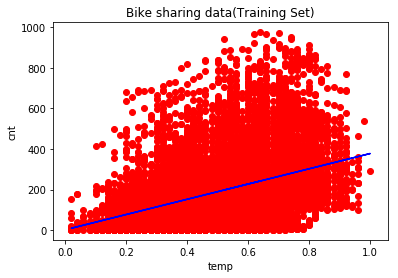

In [27]:
# visualizing the training set result
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Bike sharing data(Training Set)')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

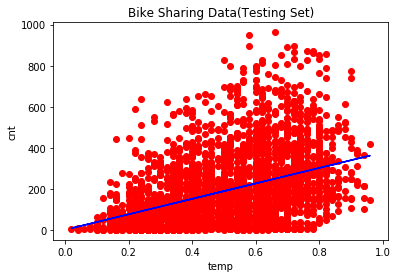

In [28]:
# visualizing the testing set result
plt.scatter(x_cv,y_cv,color='red')
plt.plot(x_cv,regressor.predict(x_cv),color='blue')
plt.title('Bike Sharing Data(Testing Set)')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

In [29]:
train_accuracy = sklearn.metrics.r2_score(y,y_predict_train)
train_accuracy = (1-train_accuracy)*100
print("Accuracy of train data =",train_accuracy)

test_accuraccy = sklearn.metrics.r2_score(y_cv,y_predict_cv)
test_accuraccy = (1-test_accuraccy)*100
print("Accuracy of test data =",  test_accuraccy)

Accuracy of train data = 83.97774710407975
Accuracy of test data = 83.15075018258409


In [30]:
# create model with pickle file
file = open('training.pkl', 'wb')
pickle.dump(regressor,file)
file.close()